<h1> K-means with PCA data

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
df_pca = pd.read_csv("../data/processed/pca_3d_features.csv")
df_pca.head(3)

,Customer ID,PC1,PC2,PC3
0,12346.0,6.682060,54.061766,-10.740796
1,12347.0,0.881733,-0.362321,-0.021707
2,12348.0,-0.238705,0.028543,0.027791


<h3> Silhouette Score with PCA

In [6]:
X_pca = df_pca[['PC1', 'PC2', 'PC3']].values
K_range = range(2, 11)

In [7]:
sil_score = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    sil_score.append(score)
print(sil_score)

[0.9318321253140416, 0.9242403266859931, 0.9249990078719216, 0.5627763718985047, 0.5101542046144919, 0.5139908623041232, 0.5178582573651515, 0.5203177769290809, 0.5198249652835583]


<h3> K-means (set k = 3) & visualization with PCA

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

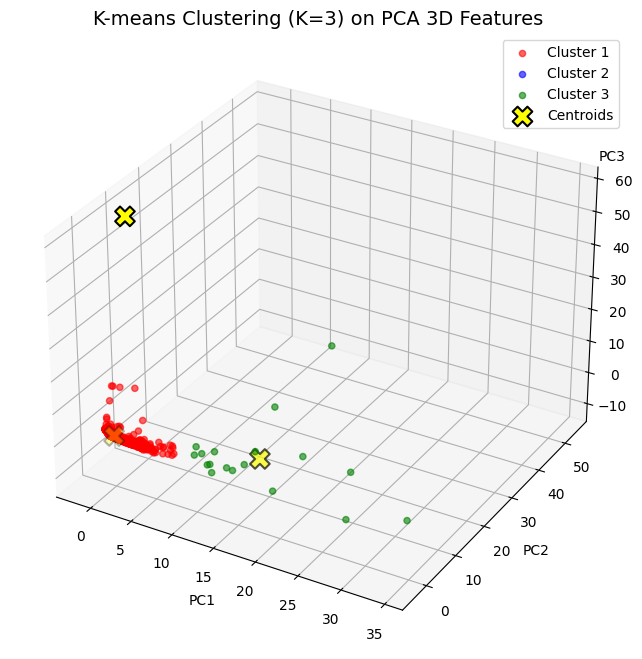

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")

colors = ["red", "blue", "green"]

for k in range(3):
    cluster_points = X_pca[labels == k]
    ax.scatter(
        cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
        s=20, alpha=0.6, color=colors[k], label=f'Cluster {k+1}'
    )

ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    s=200,
    color='yellow',
    edgecolor='black',
    linewidth=1.5,
        marker='X',
    zorder=100,
    label='Centroids'
)

ax.set_title('K-means Clustering (K=3) on PCA 3D Features', fontsize=14)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.text2D(0.999, 0.8, "PC3",
          transform=ax.transAxes, 
          va="center", ha="right")
ax.legend()

plt.show()

In [10]:
df_pca["cluster"] = labels
df_pca.head(3)

,Customer ID,PC1,PC2,PC3,cluster
0,12346.0,6.682060,54.061766,-10.740796,2
1,12347.0,0.881733,-0.362321,-0.021707,0
2,12348.0,-0.238705,0.028543,0.027791,0


In [12]:
df_pca["cluster"].value_counts()

cluster
0    4320
2      18
1       1
Name: count, dtype: int64